### Section I: Import the data

In [48]:
%matplotlib inline 

import pandas as pd
import seaborn as sb

In [49]:
mtcars = pd.read_csv("../../assets/datasets/mtcars.csv")
mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Plot the Data

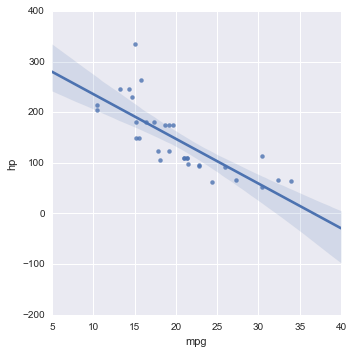

In [50]:
sb.lmplot(data=mtcars, x='mpg', y='hp')

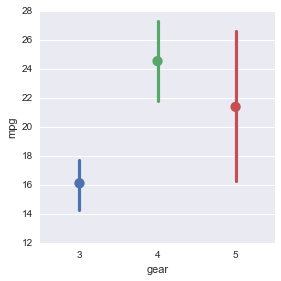

In [51]:
sb.factorplot(data=mtcars, x='gear', y='mpg', hue='gear', kind='point')

### Extract the features you to use in clustering into a matrix

In [52]:
X = mtcars[['mpg', 
            'cyl',
            'disp',
            'hp',
            'drat',
            'wt',
            'qsec',
            'vs',
            'am',
            'gear',
            'carb']
          ]

### Cluster the data using K-Means Clustering

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [53]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters = 5)
cluster_model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

### Find the Silhoutte Score and plot the features and clusters

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score(X, cluster_model.labels_, metric='euclidean')

0.475384589036142

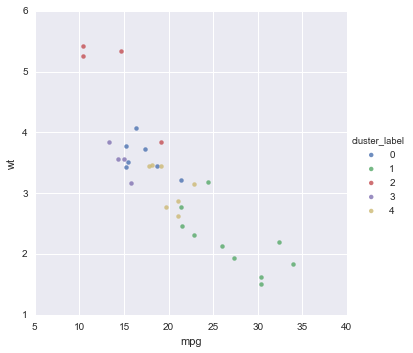

In [55]:
mtcars['cluster_label'] = cluster_model.labels_

sb.lmplot(
    x = 'mpg',
    y = 'wt',
    hue = 'cluster_label',
    data = mtcars,
    fit_reg=False
)